In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# есть ли связь между жёсткостью воды и средней годовой смертностью?
df = pd.read_csv('water.csv', 'r', delimiter = ',')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


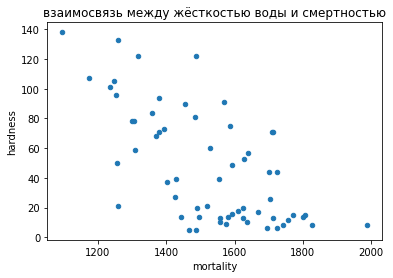

In [ ]:
df.plot(kind = 'scatter',
        title = 'взаимосвязь между жёсткостью воды и смертностью',
        x = 'mortality',
        y = 'hardness')
# точечный график

In [ ]:
df[['mortality', 'hardness']].corr()
# коэффициент корреляции Пирсона, обратная зависимость

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [ ]:
df[['mortality', 'hardness']].corr(method = 'spearman')
# коэффициент корреляции Cпирмена

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x = df[['mortality']]
y = df['hardness']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.coef_
# -0.13

array([-0.12670202])

In [ ]:
model.intercept_
# y = -0.13x + 239

239.3678426140957

In [ ]:
y_pred = model.predict(x_test)

array([81.3704298 , 41.96610311, 49.94833006, 23.72101293, 73.76830889,
       33.4770681 , 79.85000562, 38.29174467, 46.9074817 , 24.48122503,
       73.51490486, 51.21535021, 42.34620915, 11.30421546, 22.83409883,
       58.43736507, 31.95664392, 10.41730135, 82.76415197])

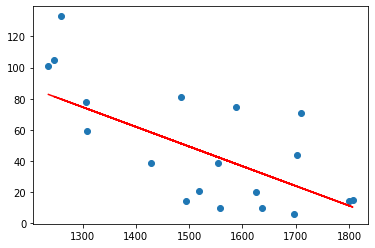

In [ ]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')
# модель линейной регрессии

In [ ]:
model.score(x_test, y_test)
# коэффициент детерминации

0.4948982822876836

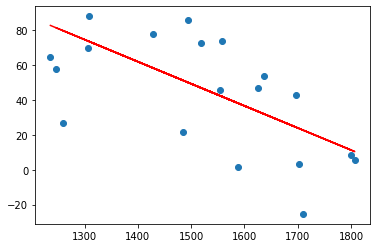

In [ ]:
plt.scatter(x_test, y_pred + (y_pred - y_test))
plt.plot(x_test, y_pred, c = 'r')
# график остатков

In [ ]:
таким образом, по всем вычислениям невозможно точно сказать, что связь между смертностью и жёсткостью воды есть, 
чем выше жёсткость - тем меньше смертность, и наоборот, либо какой-то третий фактор влияет на эти два

In [ ]:
# сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
# разделеняю на север и юг и повторяю аналогичные шаги из предыдущего пункта для каждой группы по отдельности
south = df[df['location']=='South'][['mortality', 'hardness']]
north = df[df['location']=='North'][['mortality', 'hardness']]

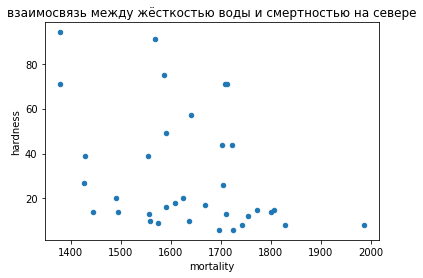

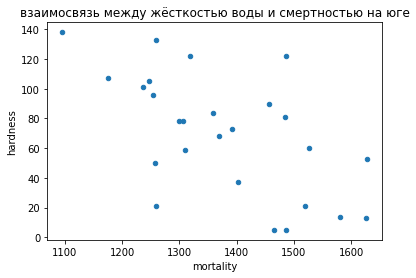

In [ ]:
north.plot(kind = 'scatter',
      title = 'взаимосвязь между жёсткостью воды и смертностью на севере',
      x = 'mortality',
      y = 'hardness')

south.plot(kind = 'scatter',
      title = 'взаимосвязь между жёсткостью воды и смертностью на юге',
      x = 'mortality',
      y = 'hardness')

In [ ]:
north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [ ]:
south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [ ]:
north[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [ ]:
south[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [ ]:
xn = north[['mortality']]
yn = north['hardness']
xs = south[['mortality']]
ys = south['hardness']

In [ ]:
xn_train, xn_test, yn_train, yn_test = train_test_split(xn, yn, test_size = 0.30, random_state = 42)
xs_train, xs_test, ys_train, ys_test = train_test_split(xs, ys, test_size = 0.30, random_state = 42)

In [ ]:
# СЕВЕР
model.fit(xn_train, yn_train)

LinearRegression()

In [ ]:
model.coef_

array([-0.09774218])

In [ ]:
model.intercept_
# y = -0.98x + 192

191.7279767911201

In [ ]:
yn_pred = model.predict(xn_test)

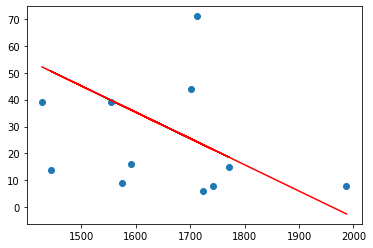

In [ ]:
plt.scatter(xn_test, yn_test)
plt.plot(xn_test, yn_pred, c = 'r')
# линейная регрессия

In [ ]:
model.score(xn_test, yn_test)
# коэффициент детерминации

-0.34863672627416764

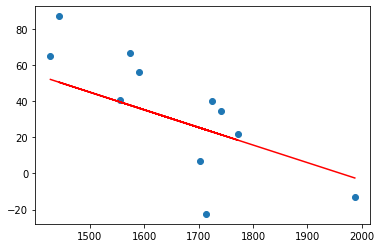

In [ ]:
plt.scatter(xn_test, yn_pred + (yn_pred - yn_test))
plt.plot(xn_test, yn_pred, c = 'r')
# остаток

In [ ]:
# ЮГ
model.fit(xs_train, ys_train)

LinearRegression()

In [ ]:
model.coef_

array([-0.18112812])

In [ ]:
model.intercept_
# -0.18x + 324

324.1190746235986

In [ ]:
ys_pred = model.predict(xs_test)

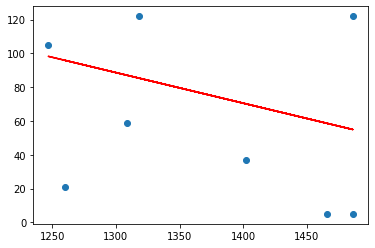

In [ ]:
plt.scatter(xs_test, ys_test)
plt.plot(xs_test, ys_pred, c = 'r')
# линейная регрессия

In [ ]:
model.score(xs_test, ys_test)
# коэффициент детерминации

-0.05226615794483802

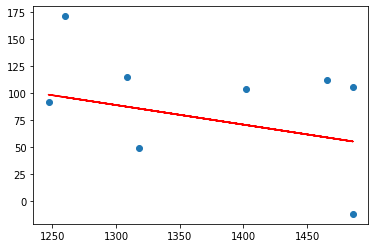

In [ ]:
plt.scatter(xs_test, ys_pred + (ys_pred - ys_test))
plt.plot(xs_test, ys_pred, c = 'r')
# остаток

In [ ]:
и если для севера данная зависимость примерно сохраняется, то для юга - не совсем. 
при разделении датасета данных остается очень мало для построения адекватной модели, это видно по коэффициентам детерминации